In [1]:
library(hexView)

data <- readEViews('EXPEND.WF1')

Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”
Warning message in readEViews("EXPEND.WF1"):
“Skipping boilerplate variable
”


In [3]:
mod1 <- lm(FOOD~PFOOD, data = data)

In [4]:
summary(mod1)


Call:
lm(formula = FOOD ~ PFOOD, data = data)

Residuals:
    Min      1Q  Median      3Q     Max 
-11.598  -5.651   0.269   3.987  10.929 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 88.65497    3.56434   24.87   <2e-16 ***
PFOOD        0.32816    0.02721   12.06    2e-11 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 7.096 on 23 degrees of freedom
Multiple R-squared:  0.8634,	Adjusted R-squared:  0.8575 
F-statistic: 145.4 on 1 and 23 DF,  p-value: 2.004e-11


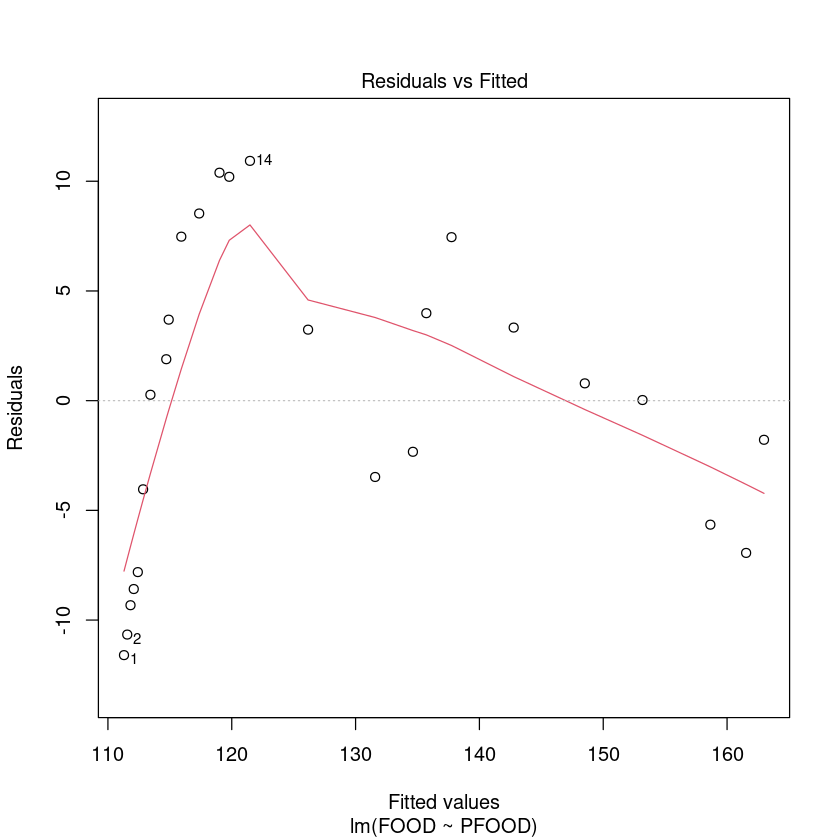

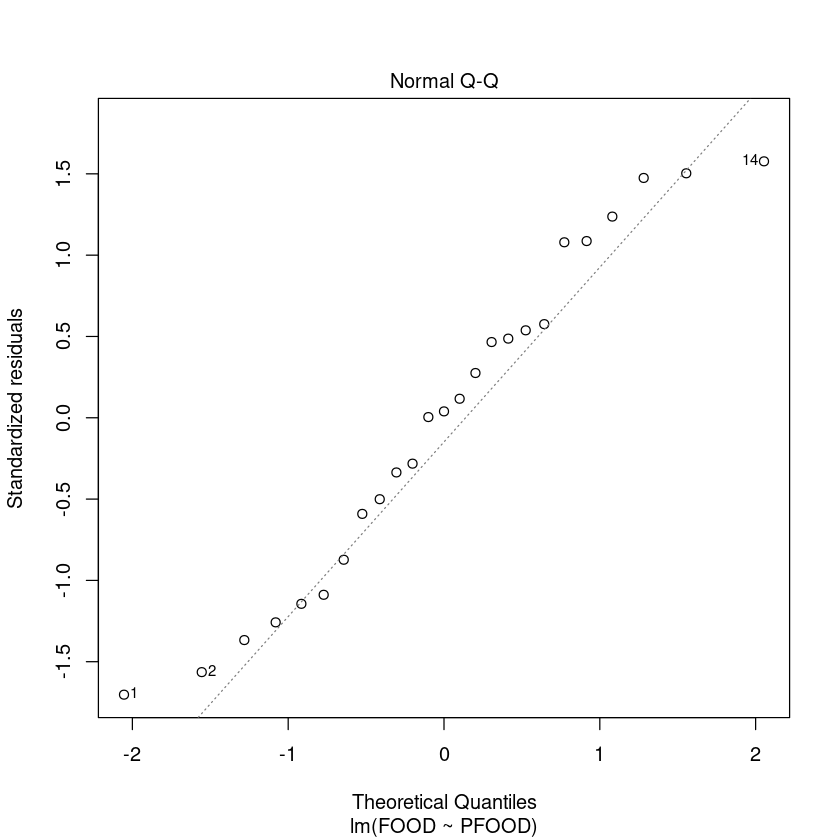

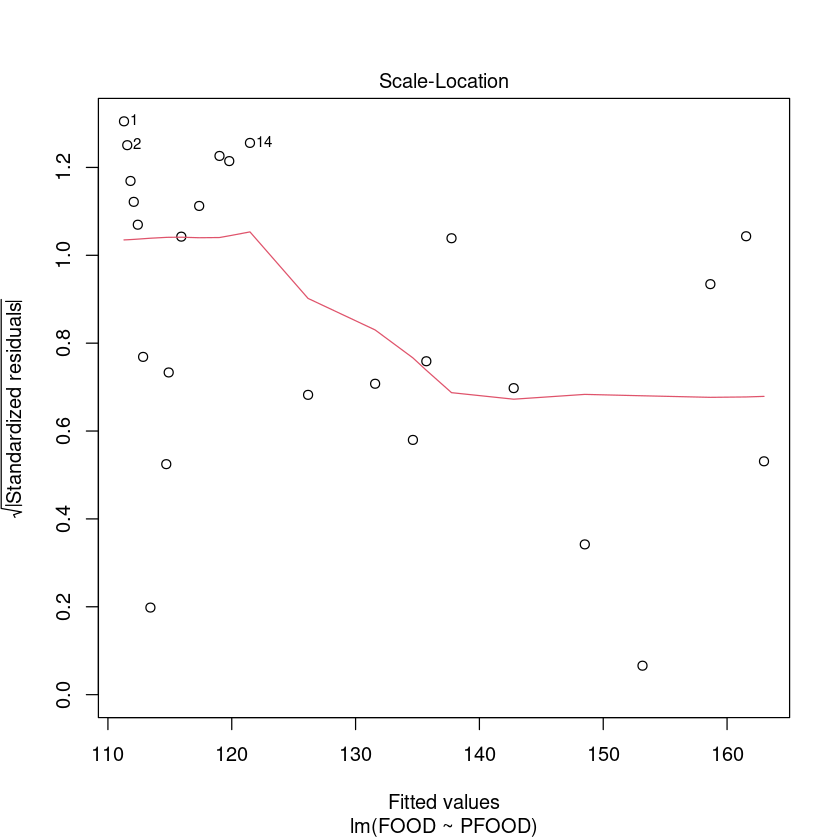

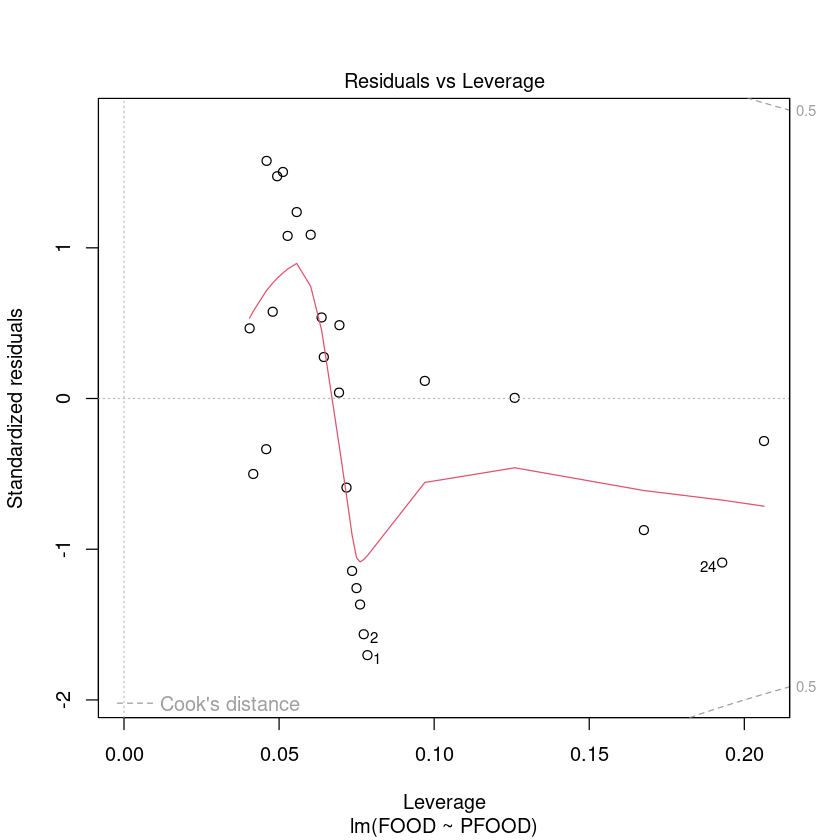

In [5]:
plot(mod1)

In [ ]:
a1<-mod1$residuals[1:24]
a2<-mod1$residuals[2:25]
plot(a1,a2)

In [6]:
library(forecast)

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 



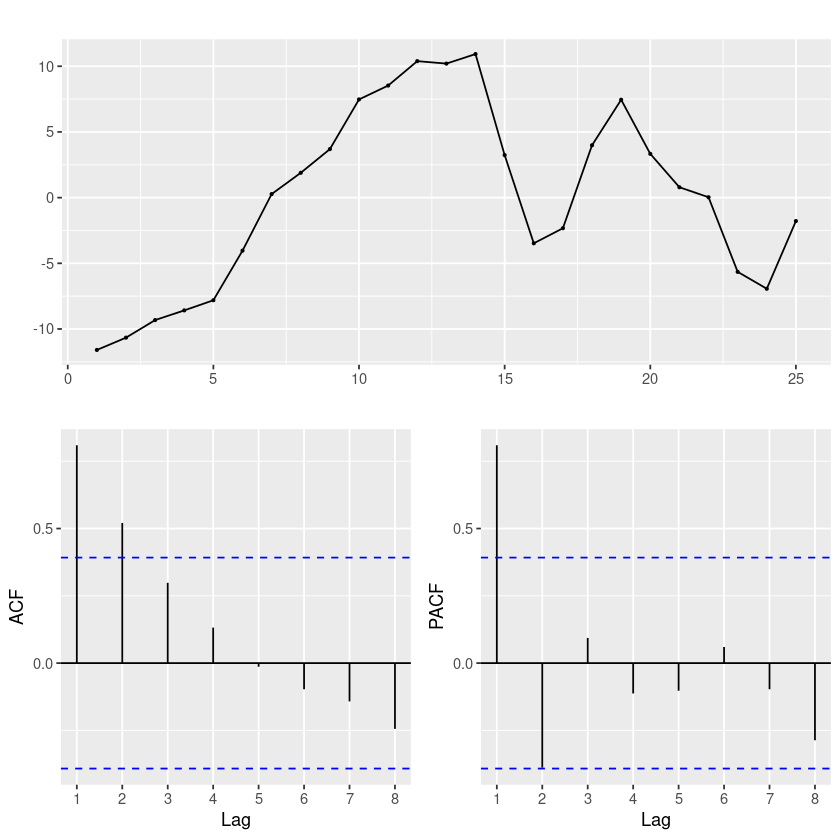

In [7]:
ggtsdisplay(mod1$residuals)


	Breusch-Godfrey test for serial correlation of order up to 5

data:  Residuals
LM test = 17.954, df = 5, p-value = 0.003005


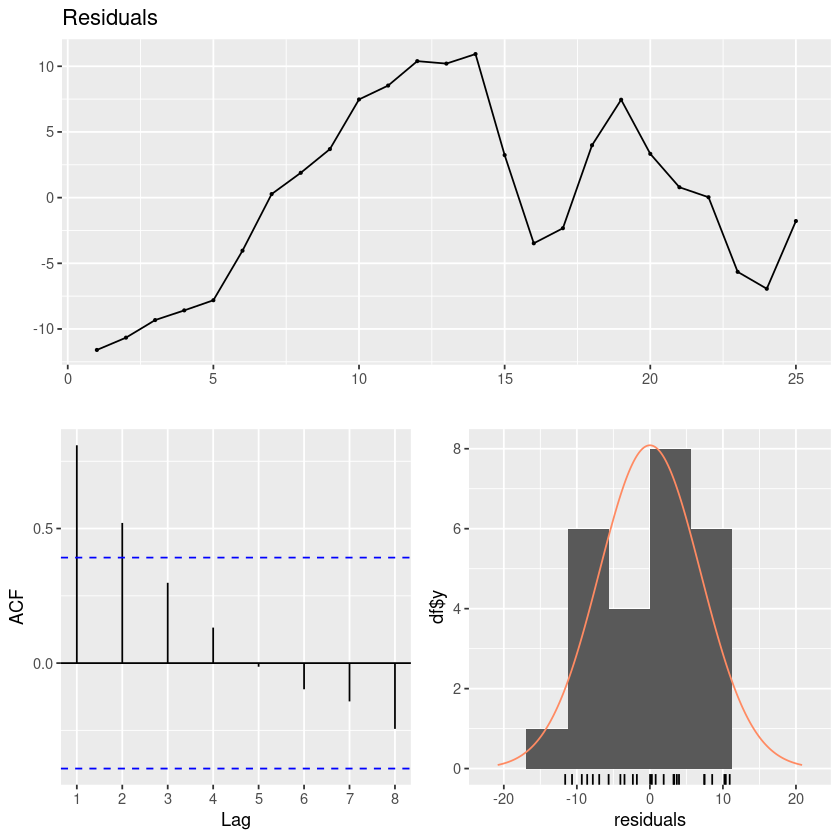

In [9]:
checkresiduals(mod1)

In [ ]:
mod1 <- lm(HOUS~DPI, data = data)
ggtsdisplay(mod1$residuals)

In [10]:
library(lmtest)

Loading required package: zoo


Attaching package: ‘zoo’


The following objects are masked from ‘package:base’:

    as.Date, as.Date.numeric




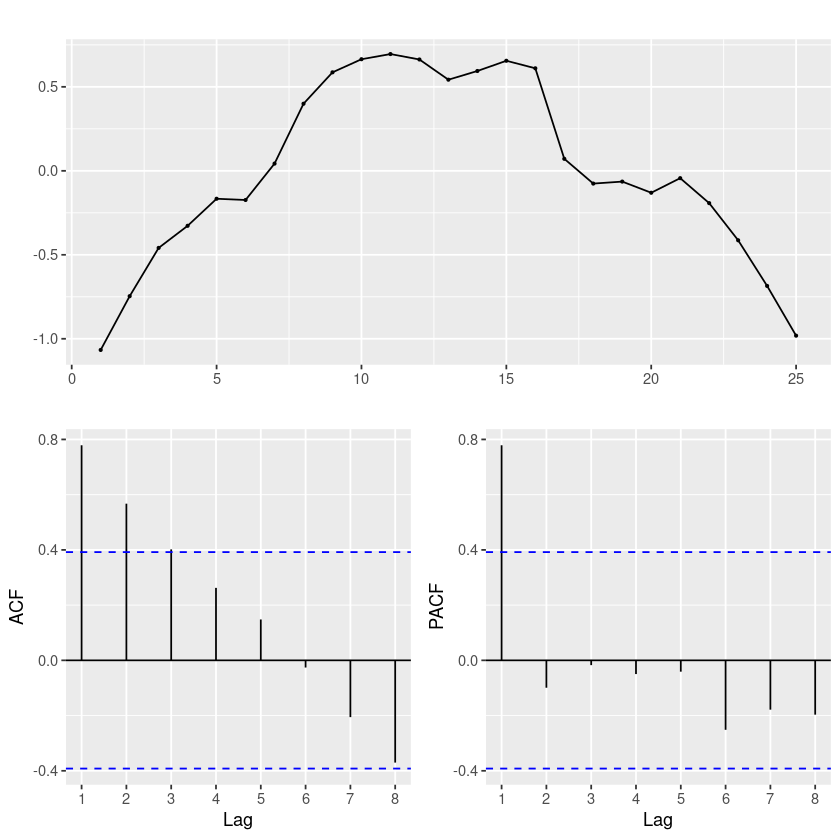

In [11]:
mod1 <- lm(COSM~DPI, data = data)
ggtsdisplay(mod1$residuals)

In [12]:
summary(mod1)


Call:
lm(formula = COSM ~ DPI, data = data)

Residuals:
     Min       1Q   Median       3Q      Max 
-1.06656 -0.32737 -0.06412  0.58641  0.69526 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 0.3372820  0.4569091   0.738    0.468    
DPI         0.0079826  0.0005683  14.048 8.97e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.5542 on 23 degrees of freedom
Multiple R-squared:  0.8956,	Adjusted R-squared:  0.8911 
F-statistic: 197.3 on 1 and 23 DF,  p-value: 8.969e-13


In [14]:
dwtest(mod1)


	Durbin-Watson test

data:  mod1
DW = 0.14512, p-value = 3.227e-15
alternative hypothesis: true autocorrelation is greater than 0


In [15]:
dwtest(mod1, alternative = 'two.sided')


	Durbin-Watson test

data:  mod1
DW = 0.14512, p-value = 6.454e-15
alternative hypothesis: true autocorrelation is not 0


In [16]:
dwtest(mod1, alternative = 'less')


	Durbin-Watson test

data:  mod1
DW = 0.14512, p-value = 1
alternative hypothesis: true autocorrelation is less than 0


In [ ]:
data1 <- read.csv('eaef30.csv')

In [ ]:
mod2 <- lm(earn ~ asvabc, data = data1)
summary(mod2)

In [ ]:
dwtest(mod2, alternative = 'greater')

In [19]:
c1 <- ts(data['COSM'], frequency = 4, start=c(1990,1))
# h1 <- ts(data['HOUS'], frequency = 4, start=c(1990,1))
d1 <- ts(data['DPI'], frequency = 4, start=c(1990,1))

In [17]:
library('dynlm')

In [20]:
mod3 <- dynlm(c1~d1+L(c1))
summary(mod3)


Time series regression with "ts" data:
Start = 1990(2), End = 1996(1)

Call:
dynlm(formula = c1 ~ d1 + L(c1))

Residuals:
     Min       1Q   Median       3Q      Max 
-0.49449 -0.10634 -0.04083  0.14355  0.37037 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) 7.748e-01  1.764e-01   4.393 0.000254 ***
d1          7.199e-06  7.189e-04   0.010 0.992105    
L(c1)       9.120e-01  8.242e-02  11.064  3.2e-10 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 0.2002 on 21 degrees of freedom
Multiple R-squared:  0.9847,	Adjusted R-squared:  0.9833 
F-statistic: 677.7 on 2 and 21 DF,  p-value: < 2.2e-16


In [21]:
dwtest(mod3, alternative = 'greater')


	Durbin-Watson test

data:  mod3
DW = 1.3042, p-value = 0.01148
alternative hypothesis: true autocorrelation is greater than 0


In [22]:
test <- dwtest(mod3, alternative = 'greater')

In [24]:
test$p.value
test$statistic

[1] 0.01147927

DW 
1.304164

In [25]:
summary(mod3)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),7.748247e-01,0.176366289,4.39326965,2.537160e-04
d1,7.199424e-06,0.000718942,0.01001391,9.921047e-01
L(c1),9.119697e-01,0.082424288,11.06433170,3.204597e-10


In [27]:
# mod3$model
sel <- summary(mod3)$coefficients[3,2]

In [28]:
(1-0.5*test$statistic)*sqrt(24/(1-24*sel^2))

DW 
1.863087

In [29]:
qnorm(0.95)# alpha = 5% for H_a: \rho>0  or  alpha = 10% H_a: \rho \neq 0

[1] 1.644854

In [30]:
qnorm(0.975)

[1] 1.959964

In [ ]:
ggtsdisplay(mod3$residuals)

In [34]:
bgtest(mod3, order = 3)


	Breusch-Godfrey test for serial correlation of order up to 3

data:  mod3
LM test = 7.9437, df = 3, p-value = 0.04719


In [ ]:
bgtest(mod3, order = 5)

In [ ]:
c1 <- ts(data['COSM'], frequency = 4, start=c(1990,1))
p1 <- ts(data['PCOSM'], frequency = 4, start=c(1990,1))
d1 <- ts(data['DPI'], frequency = 4, start=c(1990,1))

mod3 <- dynlm(c1~d1+p1+L(c1))
summary(mod3)

In [ ]:
dwtest(mod3, alternative = 'greater')

In [ ]:
library(ecm)
durbinH(mod3, "L(c1)")

In [ ]:
test <- dwtest(mod3, alternative = 'greater')

# mod3$model
sel <- summary(mod3)$coefficients[4,2]

(1-0.5*test$statistic)*sqrt(24/(1-24*sel^2))

In [ ]:
bgtest(mod3)

In [ ]:
mod3 <- dynlm(c1~d1+L(c1))
summary(mod3)

dwtest(mod3, alternative = 'greater')

In [ ]:
library(ecm)
ddd <- durbinH(mod3, "L(c1)")
ddd

In [ ]:
res <- mod3$residuals

In [ ]:
# mod4 <- dynlm(res~d1+p1+L(c1)+L(res))
mod4 <- dynlm(res~d1+L(c1)+L(res))
summary(mod4)

In [ ]:
23*summary(mod4)$r.squared

In [ ]:
qchisq(0.95,1)

In [ ]:
bgtest(mod3)

One can notice that the results are slightly different from manual version as EViews adds zeros instead of missing data caused by lagging to prevent losing of degrees of freedom

In [ ]:
# mod4 <- dynlm(res~d1+p1+L(c1)+L(res))
mod4 <- dynlm(res~d1+L(c1)+L(res)+L(res,2))
summary(mod4)

22*summary(mod4)$r.squared

qchisq(0.95,2)

In [ ]:
bgtest(mod3, order = 2)

In [ ]:
library(car)

In [ ]:
linearHypothesis(mod4, c("L(res)=0", "L(res, 2)=0"))